In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from fitgabor import GaborGenerator, trainer_fn, gabor_fn

---

## Creat a Model neuron

In [3]:
import torch
from torch import nn
from torch.nn import functional as F

class Neuron(nn.Module):
    def __init__(self, rf):
        super().__init__()
        self.rf = torch.tensor(rf.astype(np.float32))
        
    def forward(self, x):
        return F.elu((x * self.rf).sum()) + 1

In [4]:
thetas = [-np.pi/2, -np.pi/4, 0, np.pi/2, np.pi/4]
sigmas = [3, 4, 6, 5, 4]
Lambdas = [10, 14, 6, 16, 11]
psis = [0, np.pi/2, np.pi/3, -np.pi/3, np.pi/4]
centers = [(0, 0), (15, 5), (7, -10), (-12, 3), (15, -5)]

gt_rfs = []
for theta, sigma, Lambda, psi, center in zip(thetas, sigmas, Lambdas, psis, centers):
    rf = gabor_fn(theta, sigma=sigma, Lambda=Lambda, psi=psi, gamma=1, center=center, size=(36, 64), normalize=False)
    gt_rfs.append(rf)

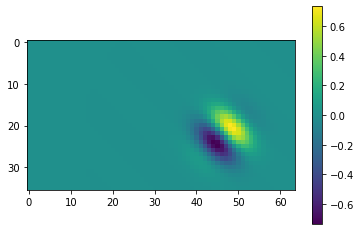

In [5]:
# aa = gabor_fn(-np.pi/3, sigma=6, Lambda=6, psi=np.pi/2, gamma=1, center=(15, 0), size=(36, 64), normalize=False)
aa = gt_rfs[1]
plt.imshow(aa);
plt.colorbar();

In [6]:
gg = GaborGenerator(image_size=(36, 64))
neuron = Neuron(aa)

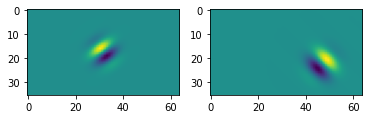

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))
ax1.imshow(gg().cpu().data.numpy());
ax2.imshow(neuron.rf.cpu().data.numpy());

In [8]:
gg, evolved_rfs = trainer_fn(gg, neuron, sigma_reg_lambda=7.25, save_rf_every_n_epoch=400)

Loss: 3.69: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [01:54<00:00, 174.22it/s]


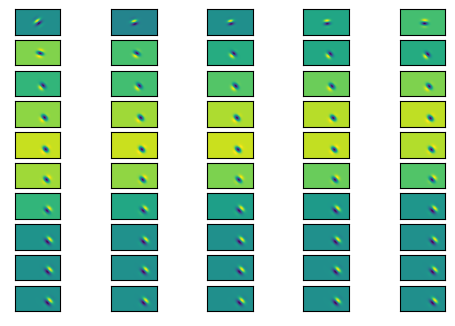

In [9]:
n_rows = 10
n_cols = (len(evolved_rfs) + n_rows - 1) // n_rows

fig, axes = plt.subplots(n_rows, n_cols, dpi=100)

for ind, ax in enumerate(axes.flat):
    if ind < len(evolved_rfs):
        ax.imshow(evolved_rfs[ind])
        ax.set(xticks=[], yticks=[])
    else:
        ax.axis('off')

In [10]:
learned_rf = gg().cpu().data.numpy()
true_rf = neuron.rf.cpu().data.numpy()

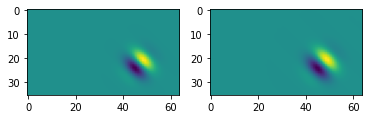

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))
ax1.imshow(learned_rf);
ax2.imshow(true_rf);

In [12]:
# gg.sigma.data = torch.tensor([4.])

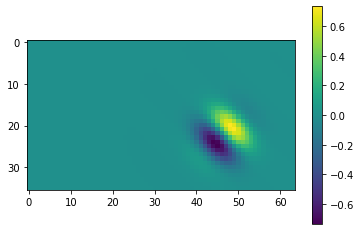

In [13]:
# aa = gabor_fn(-np.pi/3, sigma=6, Lambda=6, psi=np.pi/2, gamma=1, center=(15, 0), size=(36, 64), normalize=False)
aa = gt_rfs[0]
plt.imshow(true_rf);
plt.colorbar();

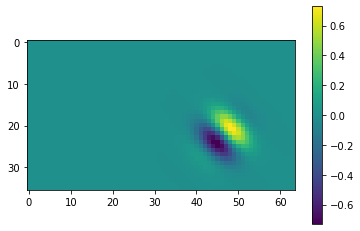

In [14]:
# aa = gabor_fn(-np.pi/3, sigma=6, Lambda=6, psi=np.pi/2, gamma=1, center=(15, 0), size=(36, 64), normalize=False)
aa = gt_rfs[0]
plt.imshow(learned_rf);
plt.colorbar();

In [42]:
neuron(gg())

tensor(64.0287, grad_fn=<AddBackward0>)

In [17]:
gg.theta

Parameter containing:
tensor([-0.7854], requires_grad=True)

In [18]:
gg.sigma

Parameter containing:
tensor([3.7162], requires_grad=True)

In [19]:
gg.Lambda

Parameter containing:
tensor([12.9361], requires_grad=True)

In [20]:
gg.psi

Parameter containing:
tensor([4.7124], requires_grad=True)

In [21]:
np.pi/4

0.7853981633974483

In [22]:
gg.gamma

Parameter containing:
tensor([1.])

In [32]:
gg().std()

tensor(0.0699, grad_fn=<StdBackward0>)

In [33]:
neuron.rf.std()

tensor(0.1024)

---

In [4]:
thetas = [-np.pi/2, -np.pi/4, 0, np.pi/2, np.pi/4]
sigmas = [3, 4, 6, 5, 4]
Lambdas = [10, 14, 6, 16, 11]
psis = [0, np.pi/2, np.pi/3, -np.pi/3, np.pi/4]
centers = [(0, 0), (15, 5), (7, -10), (-12, 3), (15, -5)]

gt_rfs = []
for theta, sigma, Lambda, psi, center in zip(thetas, sigmas, Lambdas, psis, centers):
    rf = gabor_fn(theta, sigma=sigma, Lambda=Lambda, psi=psi, gamma=1, center=center, size=(36, 64), normalize=False)
    gt_rfs.append(rf)

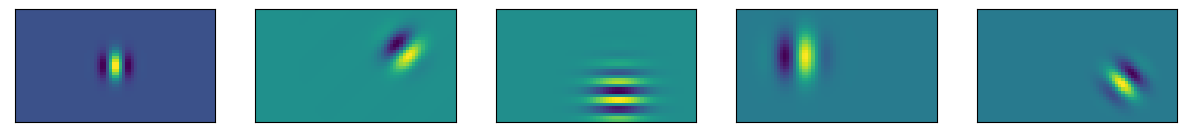

In [6]:
fig, axes = plt.subplots(1, len(gt_rfs), figsize=(15, 3), dpi=100)
for rf, ax in zip(gt_rfs, axes.flat):
    ax.imshow(rf, origin='lower', cmap='viridis') #, vmin=-np.abs(rf.max()), vmax=np.abs(rf.max()));
    ax.set(xticks=[], yticks=[])

In [8]:
befores, afters = [], []
for rf in gt_rfs:
    gabgen = GaborGenerator(image_size=(36, 64))
    neuron = Neuron(rf)
    
    befores.append(gabgen().cpu().data.numpy())
    gabgen, _ = trainer_fn(gabgen, neuron, sigma_reg_lambda=7.25) #9.5)
    afters.append(gabgen().cpu().data.numpy())

Loss: 2.54: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [01:51<00:00, 179.94it/s]


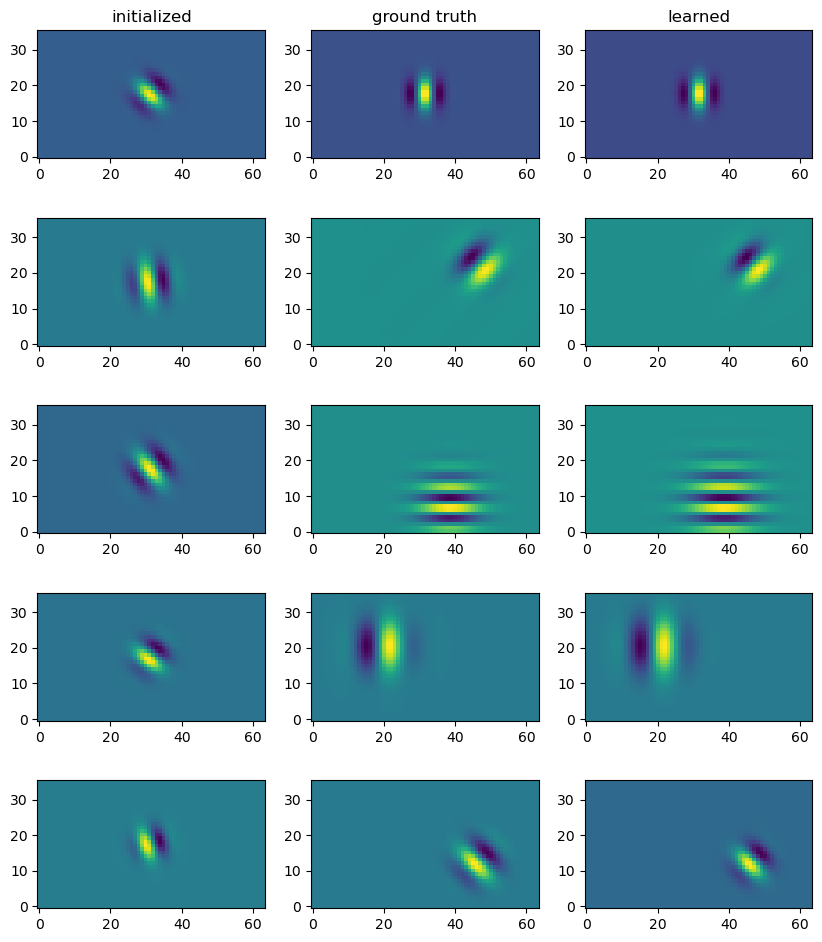

In [9]:
fig, axes = plt.subplots(len(gt_rfs), 3, figsize=(10, 12), dpi=100)
for ind_row, ax_row in enumerate(axes):
    ax_row[0].imshow(befores[ind_row], origin='lower', cmap='viridis') #, vmin=-np.abs(befores[ind_row].max()), vmax=np.abs(befores[ind_row].max()));
    ax_row[1].imshow(gt_rfs[ind_row], origin='lower', cmap='viridis') #, vmin=-np.abs(gt_rfs[ind_row].max()), vmax=np.abs(gt_rfs[ind_row].max()));
    ax_row[2].imshow(afters[ind_row], origin='lower', cmap='viridis') #, vmin=-np.abs(afters[ind_row].max()), vmax=np.abs(afters[ind_row].max()));
    
#     for ax in ax_row:
#         ax.set(xticks=[], yticks=[])
        
    if ind_row == 0:
        ax_row[0].set_title("initialized")
        ax_row[1].set_title("ground truth")
        ax_row[2].set_title("learned")